# Seyed Mohammad Amin Atyabi - 830402014 - HW 1 (Part 3)

در ابتدا فایل فیلم های انتخابی کارمندان خوانده شد و لیستی از کامندان، فیلم های معرفی شده توسط آن ها و روابط آن ها تهیه شد.

سپس به کمک مستندات کتابخانه و منابع موجود در اینترنت یک گراف ساخته شده.
به این گراف گره های شبکه و ارتباط میان آن ها افزوده شد.

با توجه به اینکه محل گره ها به صورتی تصادفی و سایز آن ها اندازه پشفرض و کوچک است، محل آن ها در دو ستون رو به روی هم و با اندازه یکسان از یکدیگر مشخص شد.
همچنین اندازه هر گره با توجه به طول اسم آن تعیین گردید.

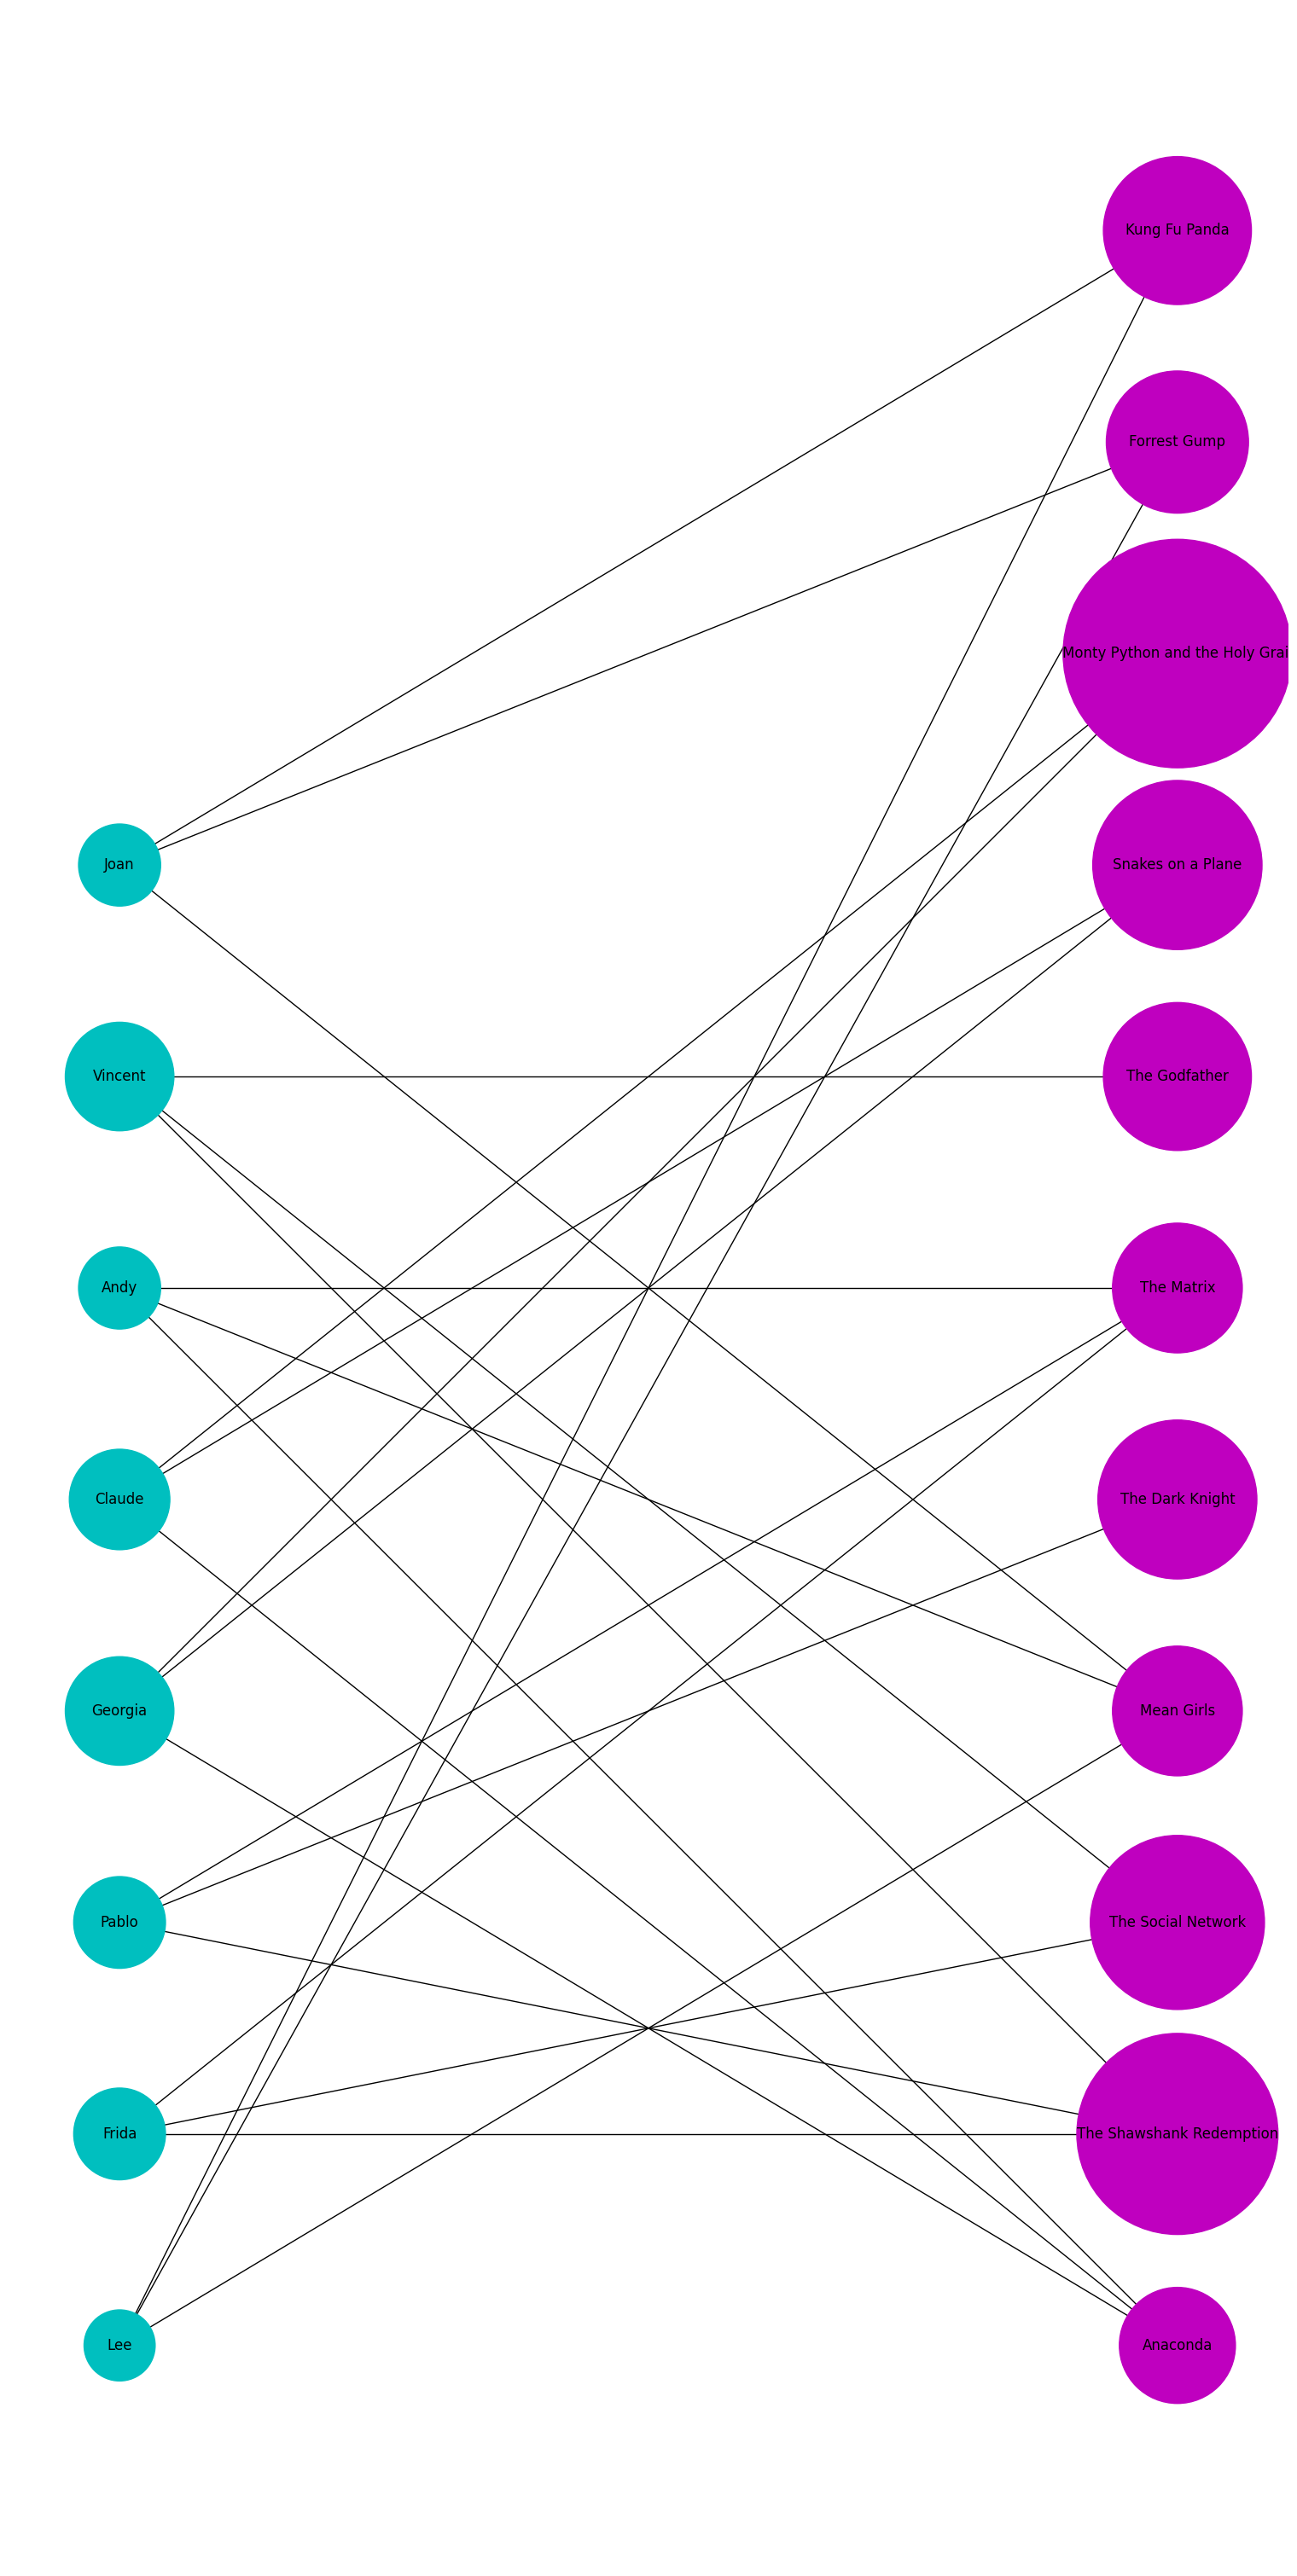

In [1]:
import networkx
from matplotlib import pyplot as plt

employee = set()
movie = set()
choice = []

with open('Data/Employee_Movie_Choices.txt') as file:
    for line in file:
        e, m = line.strip().split("\t", 1)
        if e[0] == '#':
            continue
        employee.add(e)
        movie.add(m)
        choice.append((e, m))

graph = networkx.Graph()
graph.add_nodes_from(employee, bipartite=0)
graph.add_nodes_from(movie, bipartite=1)
graph.add_edges_from(choice)
emp, mov = networkx.bipartite.sets(graph)

color = networkx.bipartite.color(graph)

color_dict = {0: 'c', 1: 'm'}

color_list = [color_dict[i[1]] for i in graph.nodes.data('bipartite')]

pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(emp))
pos.update((n, (2, i)) for i, n in enumerate(mov))

nodes = []
nodes.extend(employee)
nodes.extend(movie)
node_size = [len(n) * 1200 for n in nodes]

plt.figure(figsize=(15, 30))
networkx.draw(graph, pos=pos, with_labels=True, node_color=color_list, node_size=node_size)
plt.show()